## Flood Regression 
Codelab to predict when the flood will happen, the dataset is from the Kaggle [Flood Predections](https://www.kaggle.com/competitions/playground-series-s4e5/data). This dataset consist of 800k row of flood data with 22 feature, with the FloodProbability as the Target Feature.

### Data Loading
First thing first we need to load the data with our panda library

In [1]:
## Import the pandas and load the csv
import pandas as pd

df_train = pd.read_csv("../flood_dataset/train.csv")
df_train

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117952,1117952,3,3,4,10,4,5,5,7,10,...,7,8,7,2,2,1,4,6,4,0.495
1117953,1117953,2,2,4,3,9,5,8,1,3,...,9,4,4,3,7,4,9,4,5,0.480
1117954,1117954,7,3,9,4,6,5,9,1,3,...,5,5,5,5,6,5,5,2,4,0.485
1117955,1117955,7,3,3,7,5,2,3,4,6,...,6,8,5,3,4,6,7,6,4,0.495


### Data Cleaning and Transformation
As the best practice, it's always to make sure to check the type data of the dataset and make sure also to check the missing values and outlier even though the dataset stated it was clean to make sure it can be fit for the model.

In [2]:
## Show the dataset information
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 22 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   id                               1117957 non-null  int64  
 1   MonsoonIntensity                 1117957 non-null  int64  
 2   TopographyDrainage               1117957 non-null  int64  
 3   RiverManagement                  1117957 non-null  int64  
 4   Deforestation                    1117957 non-null  int64  
 5   Urbanization                     1117957 non-null  int64  
 6   ClimateChange                    1117957 non-null  int64  
 7   DamsQuality                      1117957 non-null  int64  
 8   Siltation                        1117957 non-null  int64  
 9   AgriculturalPractices            1117957 non-null  int64  
 10  Encroachments                    1117957 non-null  int64  
 11  IneffectiveDisasterPreparedness  1117957 non-null 

In [3]:
## Show the Statistic Description of the Dataset
df_train.describe(include="all")

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,...,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06
mean,5.589780e+05,4.921450e+00,4.926671e+00,4.955322e+00,4.942240e+00,4.942517e+00,4.934093e+00,4.955878e+00,4.927791e+00,4.942619e+00,...,4.946893e+00,4.953999e+00,4.931376e+00,4.929032e+00,4.925907e+00,4.927520e+00,4.950859e+00,4.940587e+00,4.939004e+00,5.044803e-01
std,3.227265e+05,2.056387e+00,2.093879e+00,2.072186e+00,2.051689e+00,2.083391e+00,2.057742e+00,2.083063e+00,2.065992e+00,2.068545e+00,...,2.072333e+00,2.088899e+00,2.078287e+00,2.082395e+00,2.064813e+00,2.074176e+00,2.068696e+00,2.081123e+00,2.090350e+00,5.102610e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.850000e-01
25%,2.794890e+05,3.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,...,4.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.700000e-01
50%,5.589780e+05,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,...,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.050000e-01
75%,8.384670e+05,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,...,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,5.400000e-01
max,1.117956e+06,1.600000e+01,1.800000e+01,1.600000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.600000e+01,...,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.700000e+01,1.800000e+01,1.900000e+01,1.600000e+01,1.600000e+01,7.250000e-01


In [4]:
## Check for missing value
missing_values = df_train.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

As you can we are free from the missing value, but there's still outlier that we need to watch on. One way to check this is by using the IQR (Interquartile Range).

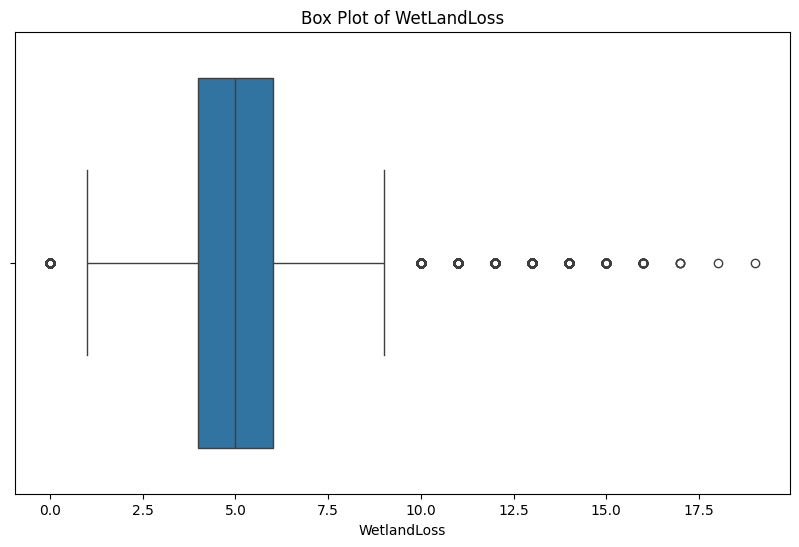

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
 
## Plot entire Box Plot
# for feature in df_train.columns:
#     plt.figure(figsize=(10, 6))
#     sns.boxplot(x=df_train[feature])
#     plt.title(f'Box Plot of {feature}')
#     plt.show()


## Plot for WetLandLoss
plt.figure(figsize=(10,6))
sns.boxplot(x=df_train["WetlandLoss"])
plt.title(f"Box Plot of WetLandLoss")
plt.show()

As you can we we have several interesting clue about this graph.
- The whisker (divider is around 1.5 up to 9.75) that are the range normal values for this variable
- Other value outside the whisker are considered outlier 

We can delete the outlier by using the IQR

In [8]:
# Identifying IQR
Q1 = df_train.quantile(0.25)
Q3 = df_train.quantile(0.75)
IQR = Q3 - Q1

# Filter dataframe untuk hanya menyimpan baris yang tidak mengandung outliers pada kolom numerik
condition = ~((df_train < (Q1 - 1.5 * IQR)) | (df_train > (Q3 + 1.5 * IQR))).any(axis=1)
df = df_train.loc[condition, df_train.columns]

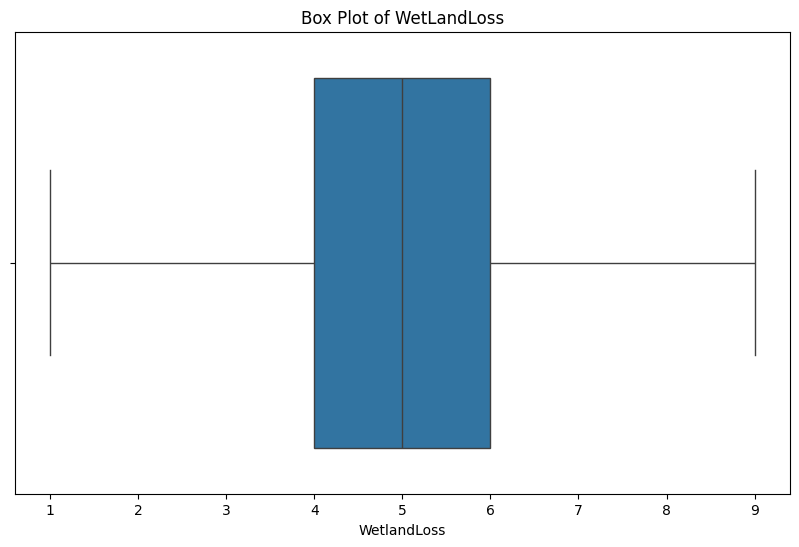

In [10]:
## Let's plot again for the WetLandLoss
plt.figure(figsize=(10,6))
sns.boxplot(x=df["WetlandLoss"])
plt.title(f"Box Plot of WetLandLoss")
plt.show()

### Scaling

Since the data are all numeric, we don't care about tranformation and labeling, so we can focus on teh Scalling and we're going for the StandardScallar

In [13]:
from sklearn.preprocessing import StandardScaler

## Make sure only the data numeric that got scalled
numeric_features = df.select_dtypes(include=["number"]).columns
numeric_features

## Standarization feature
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

### Check for Duplicate Value

In [14]:
## Check for duplicates
duplicates = df.duplicated()
 
print("Baris duplikat:")
print(df[duplicates])

Baris duplikat:
Empty DataFrame
Columns: [id, MonsoonIntensity, TopographyDrainage, RiverManagement, Deforestation, Urbanization, ClimateChange, DamsQuality, Siltation, AgriculturalPractices, Encroachments, IneffectiveDisasterPreparedness, DrainageSystems, CoastalVulnerability, Landslides, Watersheds, DeterioratingInfrastructure, PopulationScore, WetlandLoss, InadequatePlanning, PoliticalFactors, FloodProbability]
Index: []

[0 rows x 22 columns]


### Visualize the data Distribution

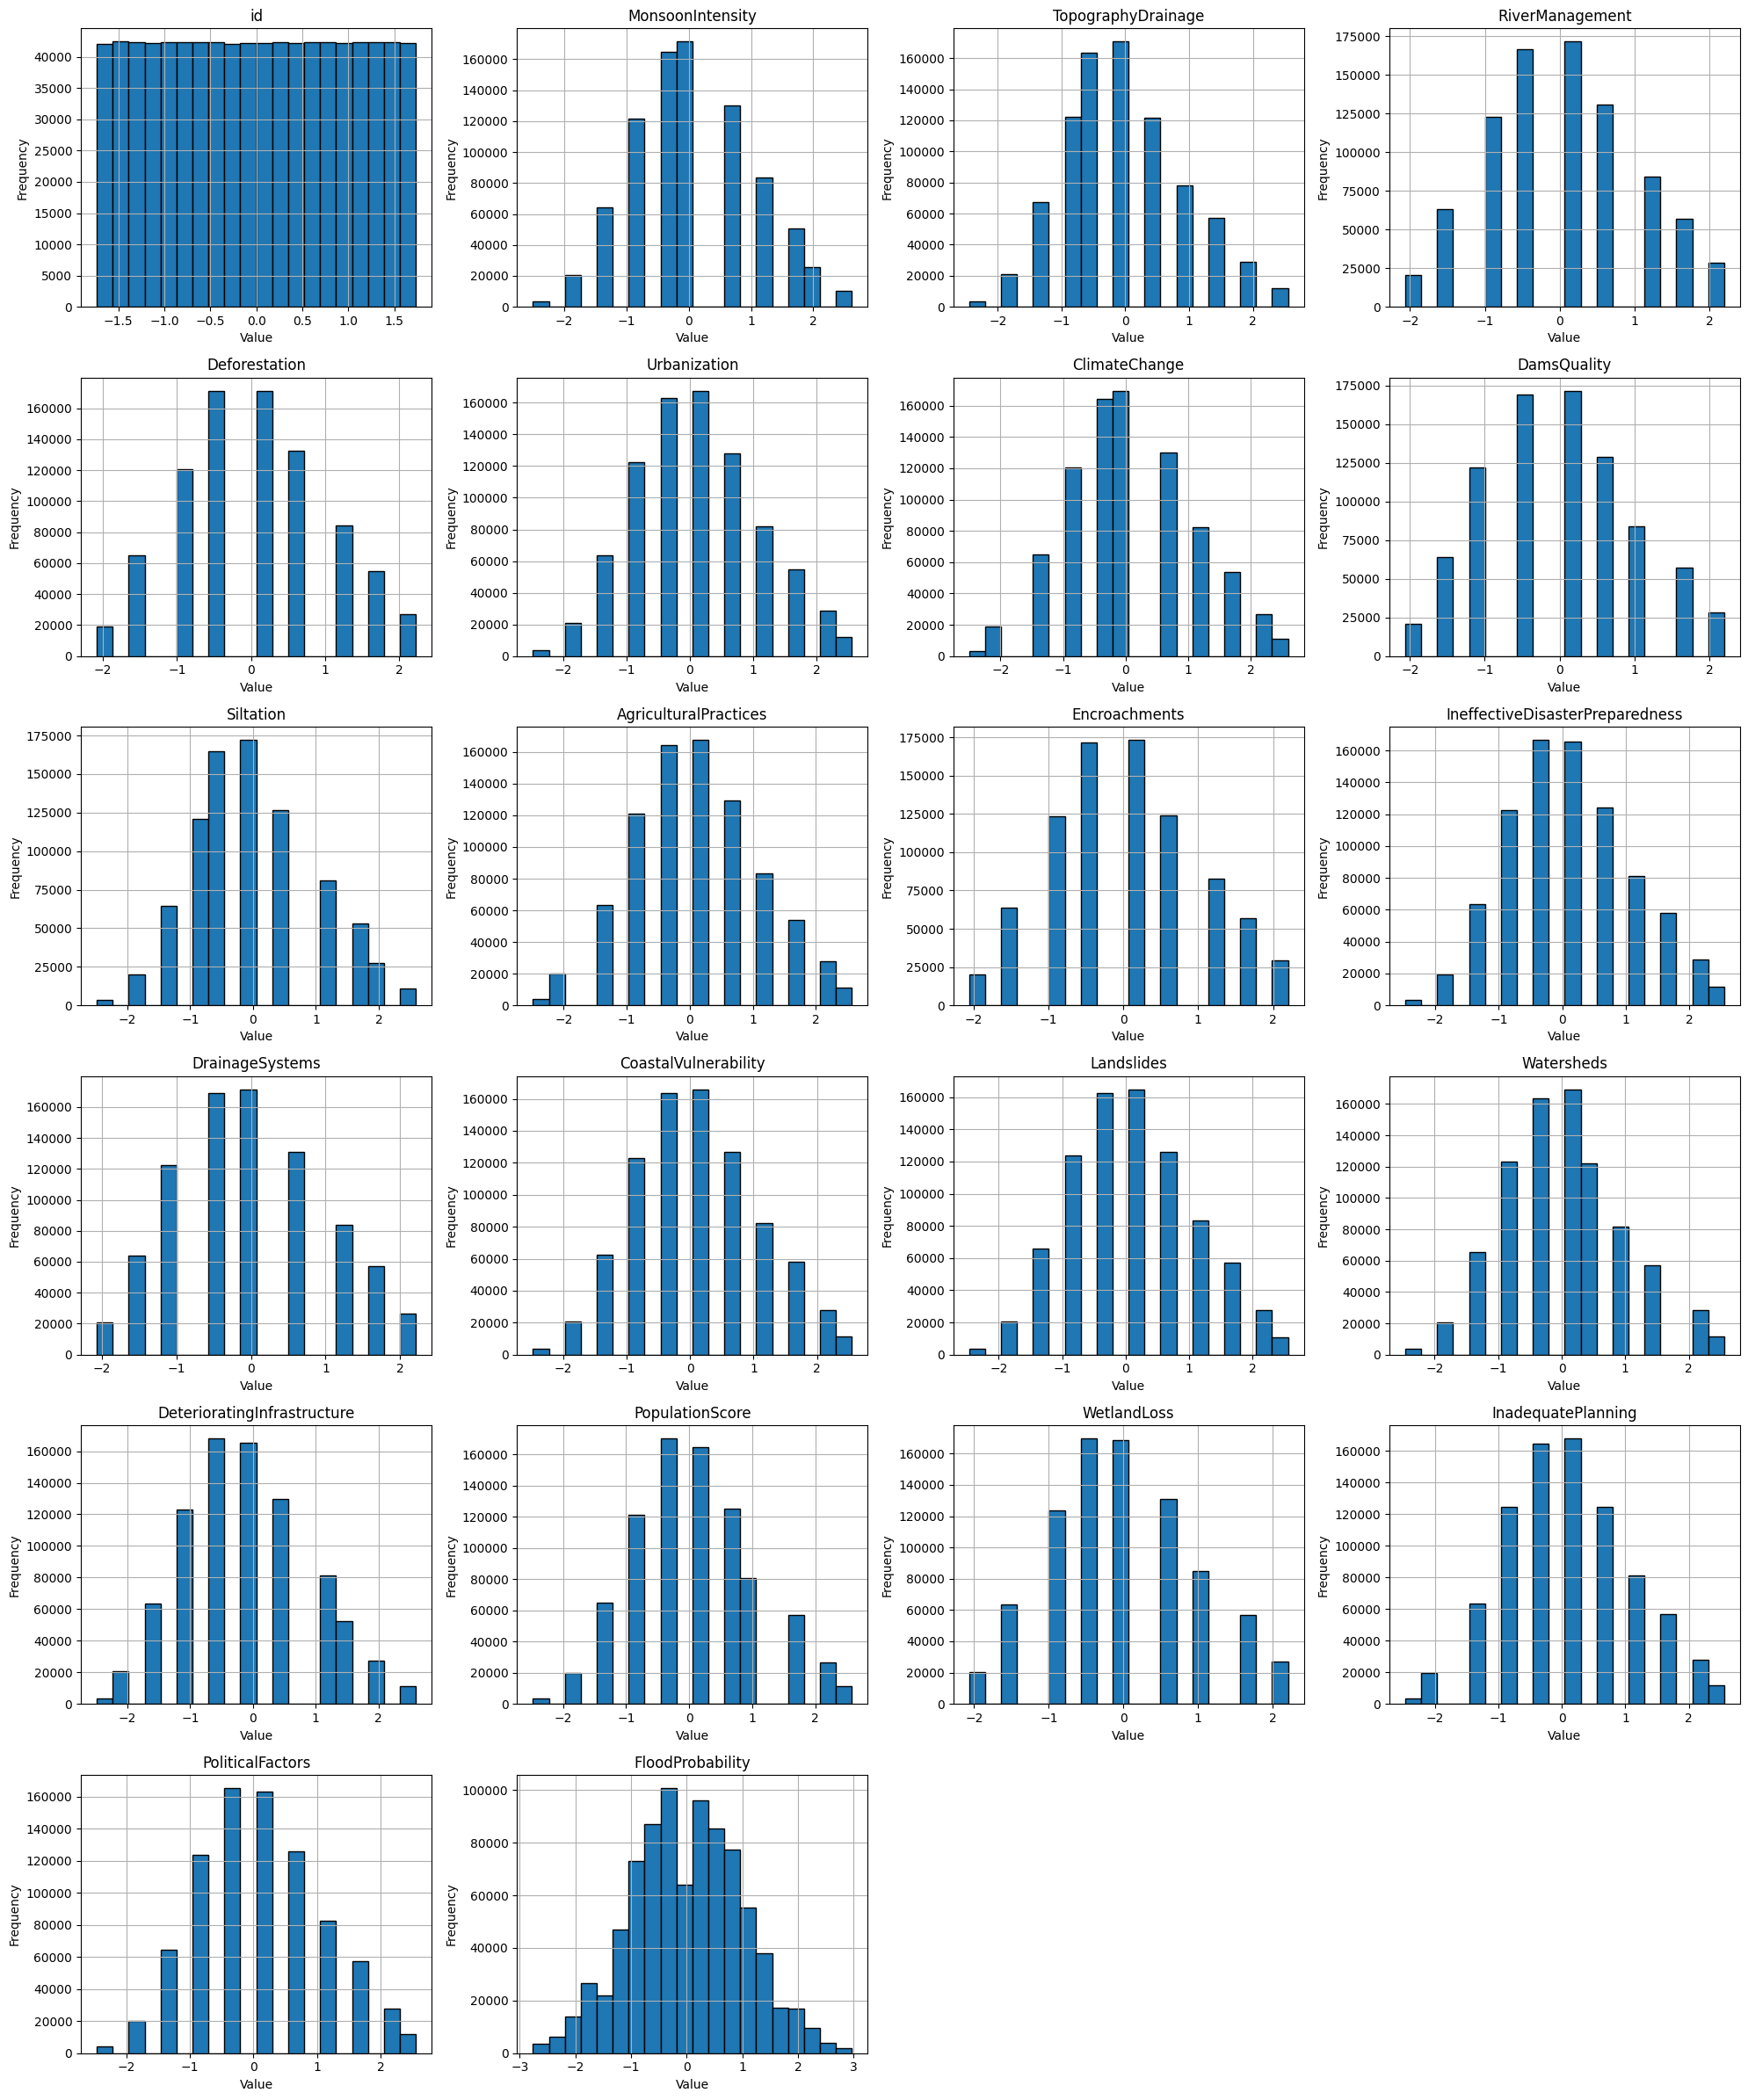

In [15]:
# Menghitung jumlah variabel
num_vars = df.shape[1]
 
# Menentukan jumlah baris dan kolom untuk grid subplot
n_cols = 4  # Jumlah kolom yang diinginkan
n_rows = -(-num_vars // n_cols)  # Ceiling division untuk menentukan jumlah baris
 
# Membuat subplot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
 
# Flatten axes array untuk memudahkan iterasi jika diperlukan
axes = axes.flatten()
 
# Plot setiap variabel
for i, column in enumerate(df.columns):
    df[column].hist(ax=axes[i], bins=20, edgecolor='black')
    axes[i].set_title(column)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
 
# Menghapus subplot yang tidak terpakai (jika ada)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
 
# Menyesuaikan layout agar lebih rapi
plt.tight_layout()
plt.show()

### Making the Model

First thing first, we need to split the dataset into train and validation set

In [16]:
import sklearn
from sklearn import datasets
 
# Memisahkan fitur (X) dan target (y)
X = df.drop(columns=['FloodProbability'])
y = df['FloodProbability']
 
from sklearn.model_selection import train_test_split
 
# membagi dataset menjadi training dan testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
 
# menghitung panjang/jumlah data
print("Jumlah data: ",len(X))
# menghitung panjang/jumlah data pada x_test
print("Jumlah data latih: ",len(x_train))
# menghitung panjang/jumlah data pada x_test
print("Jumlah data test: ",len(x_test))

Jumlah data:  845886
Jumlah data latih:  676708
Jumlah data test:  169178


### Notes
We are using diferent model regression for this task

In [19]:
### LARS 
from sklearn import linear_model
lars = linear_model.Lars(n_nonzero_coefs=1).fit(x_train, y_train)

pred_lars = lars.predict(x_test)

After training we can evaluate the model performance

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae_lars = mean_absolute_error(y_test, pred_lars)
mse_lars = mean_squared_error(y_test, pred_lars)
r2_lars = r2_score(y_test, pred_lars)

print(f"MAE: {mae_lars}")
print(f"MSE: {mse_lars}")
print(f"R²: {r2_lars}")

MAE: 0.8064965862112844
MSE: 0.9982455301765661
R²: 0.0007638833508322174


In [21]:
# Membuat dictionary untuk menyimpan hasil evaluasi
data = {
    'MAE': [mae_lars],
    'MSE': [mse_lars],
    'R2': [r2_lars]
}
 
# Konversi dictionary menjadi DataFrame
df_results = pd.DataFrame(data, index=['Lars'])
df_results

,MAE,MSE,R2
Lars,0.806497,0.998246,0.000764


In [22]:
## Linear Regression
from sklearn.linear_model import LinearRegression
LR = LinearRegression().fit(x_train, y_train)

pred_LR = LR.predict(x_test)

mae_LR = mean_absolute_error(y_test, pred_LR)
mse_LR = mean_squared_error(y_test, pred_LR)
r2_LR = r2_score(y_test, pred_LR)
 
print(f"MAE: {mae_LR}")
print(f"MSE: {mse_LR}")
print(f"R²: {r2_LR}")

## Store the result
df_results.loc['Linear Regression'] = [mae_LR, mse_LR, r2_LR]
df_results

MAE: 0.32914155892050634
MSE: 0.17129638555662158
R²: 0.8285336323325565


,MAE,MSE,R2
Lars,0.806497,0.998246,0.000764
Linear Regression,0.329142,0.171296,0.828534


In [23]:
## GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
 
GBR = GradientBoostingRegressor(random_state=184)
GBR.fit(x_train, y_train)
 
pred_GBR = GBR.predict(x_test)
 
mae_GBR = mean_absolute_error(y_test, pred_GBR)
mse_GBR = mean_squared_error(y_test, pred_GBR)
r2_GBR = r2_score(y_test, pred_GBR)
 
print(f"MAE: {mae_GBR}")
print(f"MSE: {mse_GBR}")
print(f"R²: {r2_GBR}")

## Store the result
df_results.loc['GradientBoostingRegressor'] = [mae_GBR, mse_GBR, r2_GBR]
df_results

KeyboardInterrupt: 

### Analisis

Seperti yang dapat Anda lihat pada hasil di atas, algoritma Linear Regression memiliki nilai evaluasi yang lebih baik jika dibandingkan dengan GradientBoostingRegressor. Mengapa hal itu bisa terjadi? Ada beberapa alasan mengapa algoritma Linear Regression dapat bekerja lebih baik daripada GradientBoostingRegressor dalam beberapa kasus meskipun Gradient Boosting adalah algoritma ensemble yang lebih kompleks.

Salah satu alasannya adalah data yang Anda gunakan memiliki hubungan sederhana antara fitur dan target atau bisa disebut linearitas. 

Jika hubungan antara fitur dan target bersifat linear atau hampir linear, Linear Regression mungkin akan bekerja lebih baik. Linear Regression didesain untuk menangani hubungan linear secara optimal dan tidak membutuhkan model yang kompleks untuk menemukan pola tersebut. Sebaliknya, GradientBoostingRegressor adalah model non-linear yang mencoba menangkap pola yang lebih rumit. Jika hubungan antara variabel sangat sederhana dan linear, model ini akan terlalu kompleks (overfitting) dan memberikan hasil yang lebih buruk.

Pada dasarnya, pemilihan algoritma yang tepat sangat bergantung pada karakteristik dataset dan masalah yang sedang dihadapi. Meskipun GradientBoostingRegressor secara teori lebih kuat dan fleksibel, tetapi dalam kasus tertentu Linear Regression bisa menjadi pilihan yang lebih tepat karena kesederhanaan dan kemampuan generalisasi yang lebih baik pada dataset sederhana. So, jangan asal memilih algoritma karena ingin terlihat lebih keren, ya!

